# Federico Andrucci - 000105....

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Variables
file_name = 'online_retail_red.txt'
separator = ';'
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

## 1. Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions (3 points)

In [3]:
# Open the file
file = open(file_name, mode='r')

transactions = [line.strip('\n').split(separator) for line in file.readlines()]

Print the first two transactions

In [4]:
print(f"First:\n{transactions[0]}\n\nSecond:\n{transactions[1]}")

First:
['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']

Second:
['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


## 2. Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe

In [7]:
# encode the transactions
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# creating a dataframe
df = pd.DataFrame(encoded_transactions.astype(int), columns=encoder.columns_)
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below (5 points)

_min_support: 0.xxxx - number of itemsets with at least 2 items: nn_

In [10]:
# requirements
min_itemsets = 8
min_items_in_itemset = 2

# reasonable range
support_range = np.arange(0.1, 0.01, -0.01)
min_support = 0

for support in support_range:
    print(f"Trying with support: {support}")

    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)

    # calculate the number of itemset above the threshold
    itemsets_above_threshold = sum([len(itemset) >= min_items_in_itemset for itemset in frequent_itemsets.itemsets])

    if itemsets_above_threshold >= min_itemsets:
        min_support = support
        break

if min_support == 0:
    print(f"Try with a bigger support range")
else:
    print(f"Support found: {min_support}, which produce {frequent_itemsets} itemsets, {itemsets_above_threshold} of which have more than {min_items_in_itemset} items")

Trying with support: 0.1


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.09000000000000001


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.08000000000000002


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.07000000000000002


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.060000000000000026


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.05000000000000003


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.040000000000000036


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying with support: 0.03000000000000004


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support found: 0.03000000000000004, which produce       support                                           itemsets
0    0.047835                           (6 RIBBONS RUSTIC CHARM)
1    0.032505                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.042128                      (60 TEATIME FAIRY CAKE CASES)
3    0.031051                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.049010                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
143  0.039051  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)
144  0.033960  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...
145  0.030995  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
146  0.030100  (PAPER CHAIN KIT 50'S CHRISTMAS, PAPER CHAIN K...
147  0.030547  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...

[148 rows x 2 columns] itemsets, 12 of which have more than 2 items


Printing the output as requested

In [11]:
print(f"min_support: {min_support:.4f} - number of itemsets with at least 2 items: {itemsets_above_threshold}")

min_support: 0.0300 - number of itemsets with at least 2 items: 12


## 4. Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

_use "confidence" as metric and output the line below:_

_Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n_

Just like we did before, we create a reasonable range to iterate over

In [12]:
# requirements
min_rules = 10

# reasonable range
confidence_range = np.arange(1, 0.01, -0.01)

min_confidence = 0

for confidence in confidence_range:
    print(f"Trying with confidence: {confidence:.2f}")

    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence)

    if len(rules) >= min_rules:
        min_confidence = confidence
        break

if min_confidence == 0:
    print("No confidence found, try with a bigger range")
else:
    print(f"Selected min_confidence: {min_confidence:.2f}, which produces {len(rules)} rules.")

Trying with confidence: 1.00
Trying with confidence: 0.99
Trying with confidence: 0.98
Trying with confidence: 0.97
Trying with confidence: 0.96
Trying with confidence: 0.95
Trying with confidence: 0.94
Trying with confidence: 0.93
Trying with confidence: 0.92
Trying with confidence: 0.91
Trying with confidence: 0.90
Trying with confidence: 0.89
Trying with confidence: 0.88
Trying with confidence: 0.87
Trying with confidence: 0.86
Trying with confidence: 0.85
Trying with confidence: 0.84
Trying with confidence: 0.83
Trying with confidence: 0.82
Trying with confidence: 0.81
Trying with confidence: 0.80
Trying with confidence: 0.79
Trying with confidence: 0.78
Trying with confidence: 0.77
Trying with confidence: 0.76
Trying with confidence: 0.75
Trying with confidence: 0.74
Trying with confidence: 0.73
Trying with confidence: 0.72
Trying with confidence: 0.71
Trying with confidence: 0.70
Trying with confidence: 0.69
Trying with confidence: 0.68
Trying with confidence: 0.67
Trying with co

Print output as requested

In [13]:
print(f'Metric: "confidence" - min_metric: {min_confidence:.4f} - Number of rules: {len(rules)}')

Metric: "confidence" - min_metric: 0.6100 - Number of rules: 11


## 5. Print the first 10 rules found, sorted by descending confidence and support (3 points)

In [14]:
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False).reset_index(drop=True)
sorted_rules[:-1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,0.030226,5.287817
1,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,0.028441,4.237964
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,0.036421,3.793958
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,0.036421,3.542939
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,0.028159,3.408228
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,0.036888,2.762927
6,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,0.027283,2.861250
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,0.028948,2.653102
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,0.026370,2.386273
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,0.030226,2.513347


## 6. Plot confidence and support for all the sorted rules found (3 points)

<AxesSubplot:title={'center':'Association Rules'}>

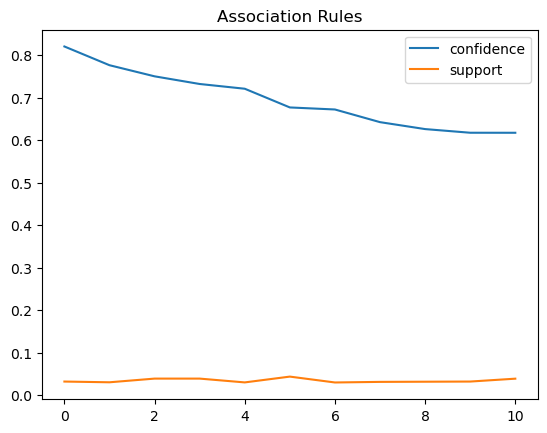

In [15]:
sorted_rules[['confidence','support']].plot(title='Association Rules')

## 7. Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (3 points)

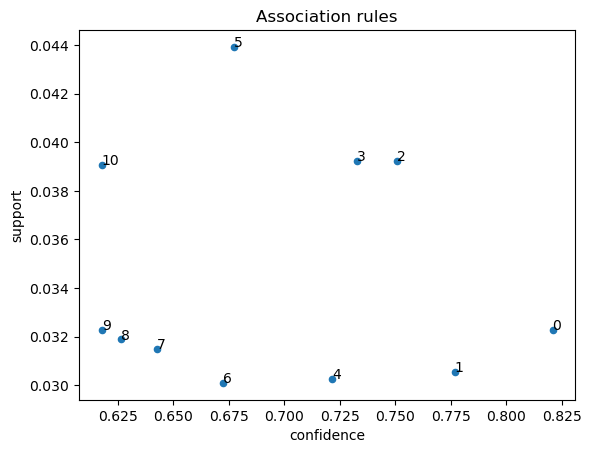

In [16]:
fig = sorted_rules.plot.scatter(x='confidence', y='support', title='Association rules')

for i in range(len(sorted_rules)):
    fig.annotate(text=i, xy=(sorted_rules['confidence'][i], sorted_rules['support'][i]))